In [ ]:
import pandas as pd

# Load the dataset
original_df = pd.read_csv('/content/aw_fb_data.csv')  # Replace with the correct file path

# Check the first few rows of the data
print(original_df.head())


   Unnamed: 0  X1  age  gender  height  weight      steps  hear_rate  \
0           1   1   20       1   168.0    65.4  10.771429  78.531302   
1           2   2   20       1   168.0    65.4  11.475325  78.453390   
2           3   3   20       1   168.0    65.4  12.179221  78.540825   
3           4   4   20       1   168.0    65.4  12.883117  78.628260   
4           5   5   20       1   168.0    65.4  13.587013  78.715695   

    calories  distance  entropy_heart  entropy_setps  resting_heart  \
0   0.344533  0.008327       6.221612       6.116349           59.0   
1   3.287625  0.008896       6.221612       6.116349           59.0   
2   9.484000  0.009466       6.221612       6.116349           59.0   
3  10.154556  0.010035       6.221612       6.116349           59.0   
4  10.825111  0.010605       6.221612       6.116349           59.0   

   corr_heart_steps  norm_heart  intensity_karvonen  sd_norm_heart  \
0          1.000000   19.531302            0.138520       1.000000   


In [ ]:
# Prepare features and target variable
X = original_df.drop(['activity'], axis=1)  # Drop the 'activity' column from features
y = original_df['activity']  # Target variable (activity)

# Encode the categorical target (activity) if not already done
from sklearn.preprocessing import LabelEncoder
le_activity = LabelEncoder()
y = le_activity.fit_transform(y)

# Check the shape of features and target
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (6264, 19)
Target shape: (6264,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of the scaled data
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")


ValueError: could not convert string to float: 'apple watch'

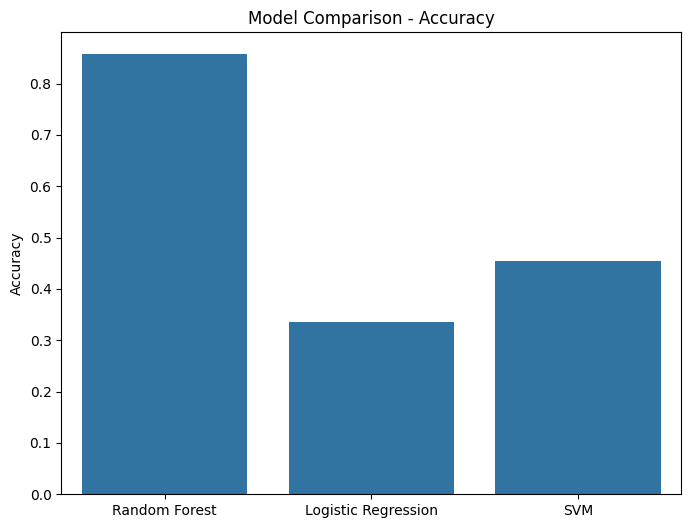

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       422
           1       0.86      0.86      0.86       256
           2       0.84      0.88      0.86       295
           3       0.91      0.93      0.92       356
           4       0.88      0.89      0.88       272
           5       0.80      0.75      0.78       279

    accuracy                           0.86      1880
   macro avg       0.86      0.86      0.86      1880
weighted avg       0.86      0.86      0.86      1880



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/aw_fb_data.csv')

# Encode the categorical columns 'device' and 'activity'
label_encoder_device = LabelEncoder()
data['device'] = label_encoder_device.fit_transform(data['device'])

label_encoder_activity = LabelEncoder()
data['activity'] = label_encoder_activity.fit_transform(data['activity'])

# Define features (X) and target (y)
X = data.drop(columns=['activity', 'Unnamed: 0', 'X1'])  # Exclude irrelevant columns
y = data['activity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Model comparison
results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Display results
plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Display classification report for the best model (e.g., Random Forest)
best_model = models["Random Forest"]  # Replace with the best-performing model
y_pred_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))


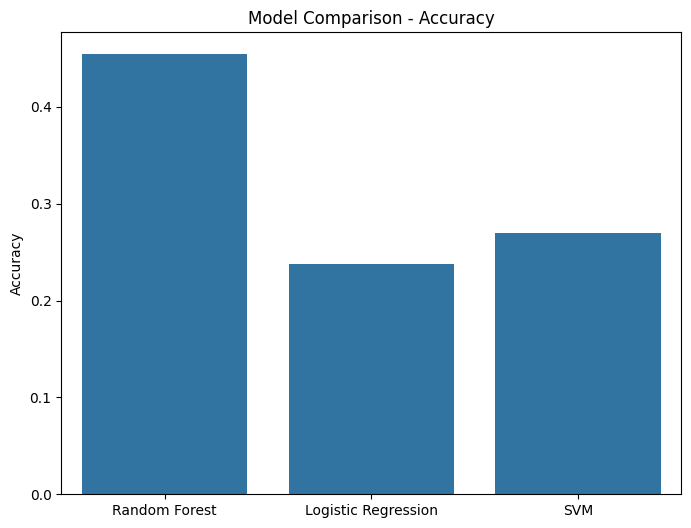

              precision    recall  f1-score   support

           0       0.42      0.61      0.50      1123
           1       0.47      0.41      0.44       935
           2       0.49      0.37      0.42       846
           3       0.47      0.53      0.50      1026
           4       0.53      0.36      0.43       889
           5       0.41      0.37      0.39       819

    accuracy                           0.45      5638
   macro avg       0.46      0.44      0.45      5638
weighted avg       0.46      0.45      0.45      5638



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/combined.csv')

# Encode the categorical columns 'device' and 'activity'
label_encoder_device = LabelEncoder()
data['device'] = label_encoder_device.fit_transform(data['device'])

label_encoder_activity = LabelEncoder()
data['activity'] = label_encoder_activity.fit_transform(data['activity'])

# Define features (X) and target (y)
X = data.drop(columns=['activity', 'Unnamed: 0', 'X1'])  # Exclude irrelevant columns
y = data['activity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42)
}

# Model comparison
results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Display results
plt.figure(figsize=(8, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Display classification report for the best model (e.g., Random Forest)
best_model = models["Random Forest"]  # Replace with the best-performing model
y_pred_best = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best))


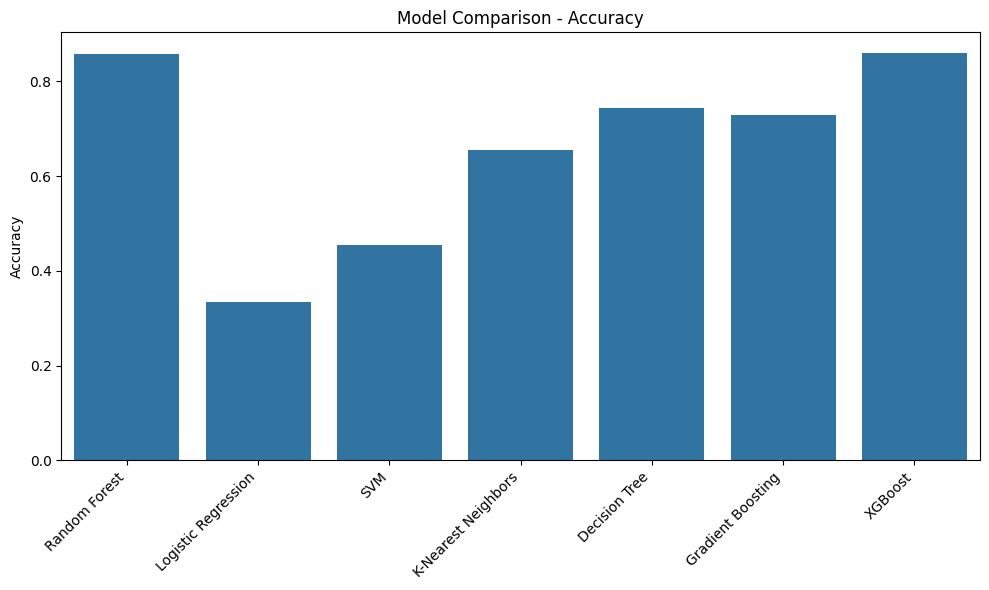

Best Model: XGBoost
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       422
           1       0.86      0.89      0.88       256
           2       0.82      0.88      0.85       295
           3       0.94      0.92      0.93       356
           4       0.89      0.89      0.89       272
           5       0.80      0.75      0.78       279

    accuracy                           0.86      1880
   macro avg       0.86      0.86      0.86      1880
weighted avg       0.86      0.86      0.86      1880



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Add additional models to compare
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Initialize dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy

# Display results in a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Display classification report for the best model
best_model_name = max(results, key=results.get)  # Get the name of the best model
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

print(f"Best Model: {best_model_name}")
print(classification_report(y_test, y_pred_best))


In [3]:
!pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

# Assuming X_train, X_test, y_train, y_test are already defined


In [ ]:
# Initialize the base classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Initialize Logistic Regression for Voting Classifier
log_reg = LogisticRegression(random_state=42)


In [ ]:
# Combine the models into a Voting Classifier (using soft voting)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('xgb', xgb_model)],
                              voting='soft')

# Fit the ensemble model on training data
voting_clf.fit(X_train, y_train)


In [ ]:
# Predict on the test set
y_pred = voting_clf.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy of the Voting Classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv('/content/aw_fb_data.csv')

# Step 2: Preprocess the dataset
# Encoding categorical columns
le_device = LabelEncoder()
df['device'] = le_device.fit_transform(df['device'])

le_activity = LabelEncoder()
df['activity'] = le_activity.fit_transform(df['activity'])

# Select features and target
X = df.drop(columns=['Unnamed: 0', 'X1', 'activity'])  # Drop non-predictive columns
y = df['activity']  # Target variable (activity)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 5: Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('xgb', xgb_model)], voting='soft')

# Step 6: Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Step 7: Evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/aw_fb_data.csv'

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv(r'C:\Users\W4FGXUV\Downloads\My\aw_fb_data.csv\aw_fb_data.csv')  # Replace with the path to your CSV file

# Step 2: Preprocess the dataset
# Encoding categorical columns
le_device = LabelEncoder()
df['device'] = le_device.fit_transform(df['device'])

le_activity = LabelEncoder()
df['activity'] = le_activity.fit_transform(df['activity'])

# Select features and target
X = df.drop(columns=['Unnamed: 0', 'X1', 'activity'])  # Drop non-predictive columns
y = df['activity']  # Target variable (activity)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize the base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 5: Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('xgb', xgb_model)], voting='soft')

# Step 6: Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Step 7: Evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test)

# Print the classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

c:\Users\W4FGXUV\AppData\Local\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:47:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       273
           1       0.87      0.87      0.87       175
           2       0.88      0.91      0.90       208
           3       0.96      0.92      0.94       235
           4       0.89      0.91      0.90       178
           5       0.82      0.82      0.82       184

    accuracy                           0.88      1253
   macro avg       0.88      0.88      0.88      1253
weighted avg       0.88      0.88      0.88      1253

Accuracy: 0.8803


In [ ]:
pip instal

100%|===================| 7486/7518 [02:44<00:00]        

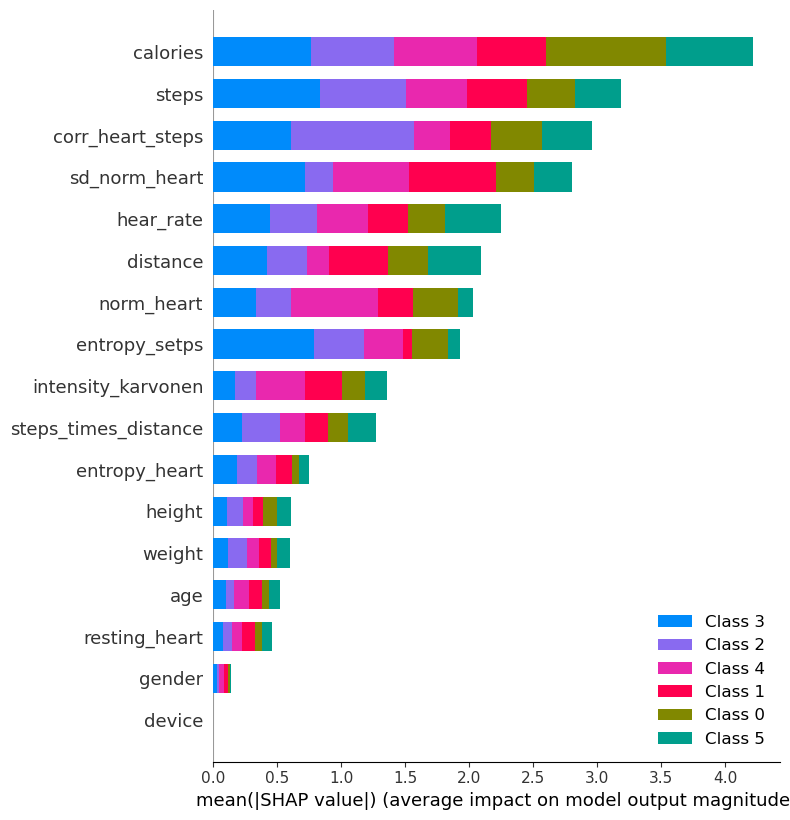

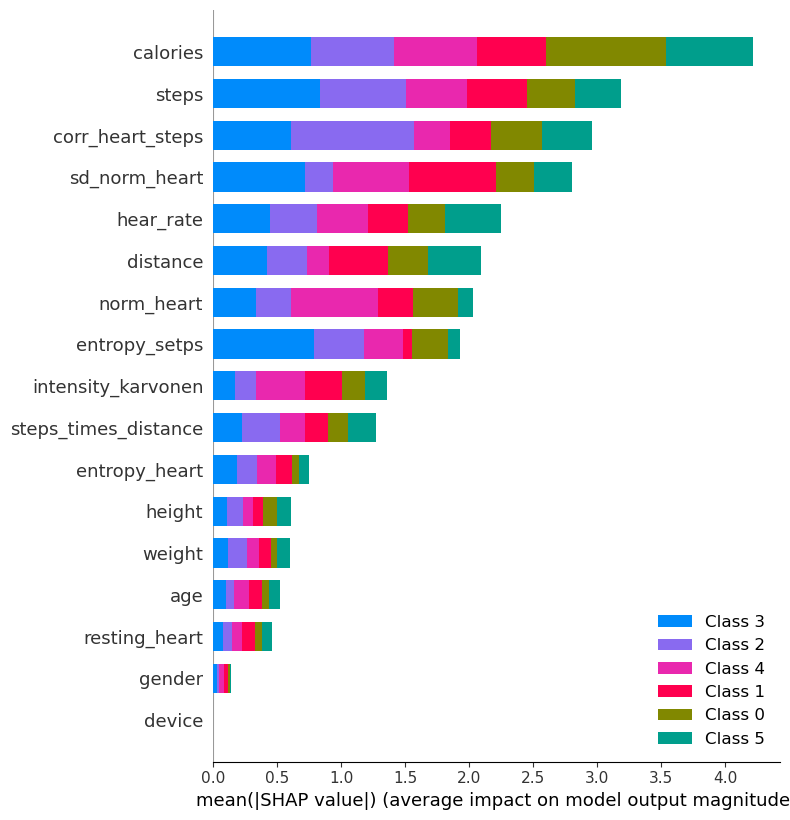

In [10]:
# Step 8: Explainable AI (XAI) - SHAP for Model Interpretation
import shap

# Initialize the SHAP Explainer
explainer = shap.Explainer(voting_clf.named_estimators_['xgb'], X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize the feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Optional: Detailed summary plot
shap.summary_plot(shap_values, X_test)


In [11]:
!pip install shap


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
 99%|===================| 7478/7518 [02:43<00:00]        

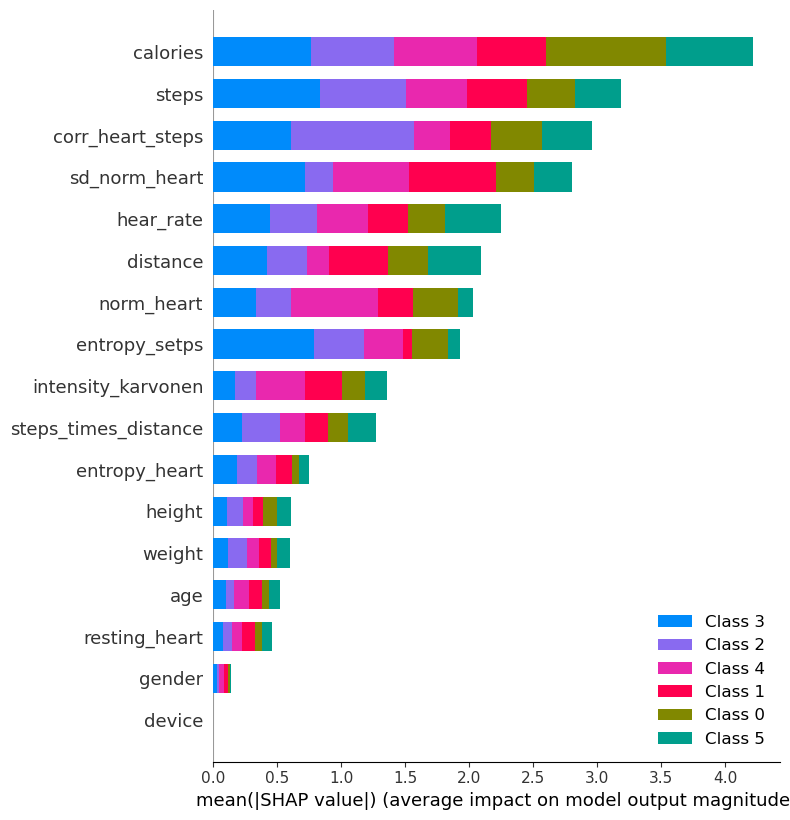

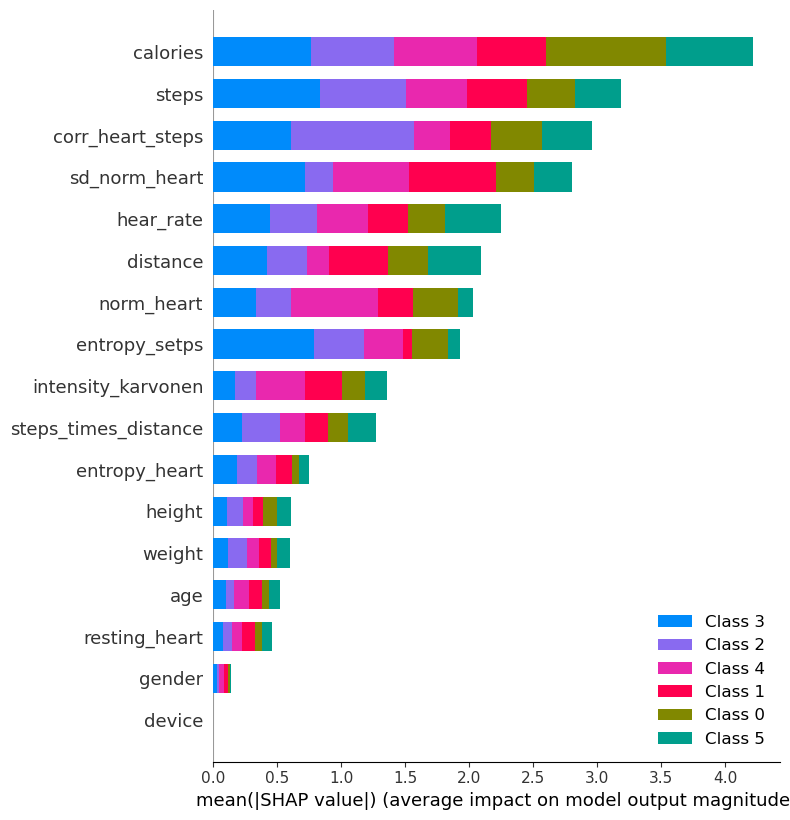

In [12]:
# Step 8: Explainable AI (XAI) - SHAP for Model Interpretation

# Install SHAP if you haven't already
!pip install shap

import shap

# Step 8.1: Create a SHAP explainer
# (using XGBoost model inside the VotingClassifier for better compatibility)
explainer = shap.Explainer(voting_clf.named_estimators_['xgb'], X_train)

# Step 8.2: Compute SHAP values for the test set
shap_values = explainer(X_test)

# Step 8.3: Plot a bar plot of feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Step 8.4 (optional): Detailed summary plot (dot plot)
shap.summary_plot(shap_values, X_test)


100%|===================| 7517/7518 [02:41<00:00]        

TypeError: 'str' object is not callable

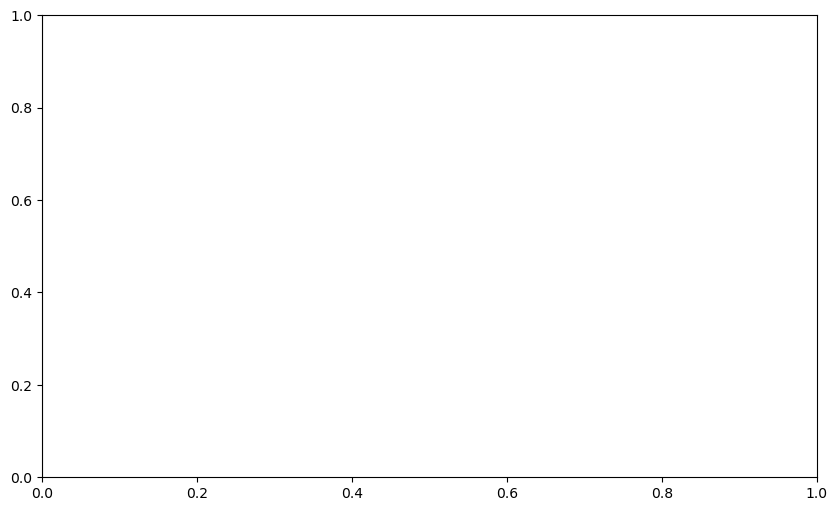

In [13]:
# Step 8: Explainable AI (XAI) - SHAP for Model Interpretation

# Install SHAP if not installed


import shap
import matplotlib.pyplot as plt

# Step 8.1: Create a SHAP Explainer
# Use the XGBoost model (better SHAP compatibility)
explainer = shap.Explainer(voting_clf.named_estimators_['xgb'], X_train)

# Step 8.2: Compute SHAP values for the test set
shap_values = explainer(X_test)

# Step 8.3: Plot Feature Importance - Bar Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_test, 
    plot_type="bar", 
    plot_size=(10, 6), 
    max_display=10,   # Top 10 features
    color='coolwarm'
)
plt.title('Feature Importance (Bar Plot)', fontsize=16)
plt.show()

# Step 8.4: Detailed Summary Plot (Beeswarm/Dot Plot)
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_test, 
    plot_size=(10, 6),
    color_bar=True,
    cmap='coolwarm'
)
plt.title('SHAP Summary Plot (Beeswarm)', fontsize=16)
plt.show()

100%|===================| 7514/7518 [02:41<00:00]        

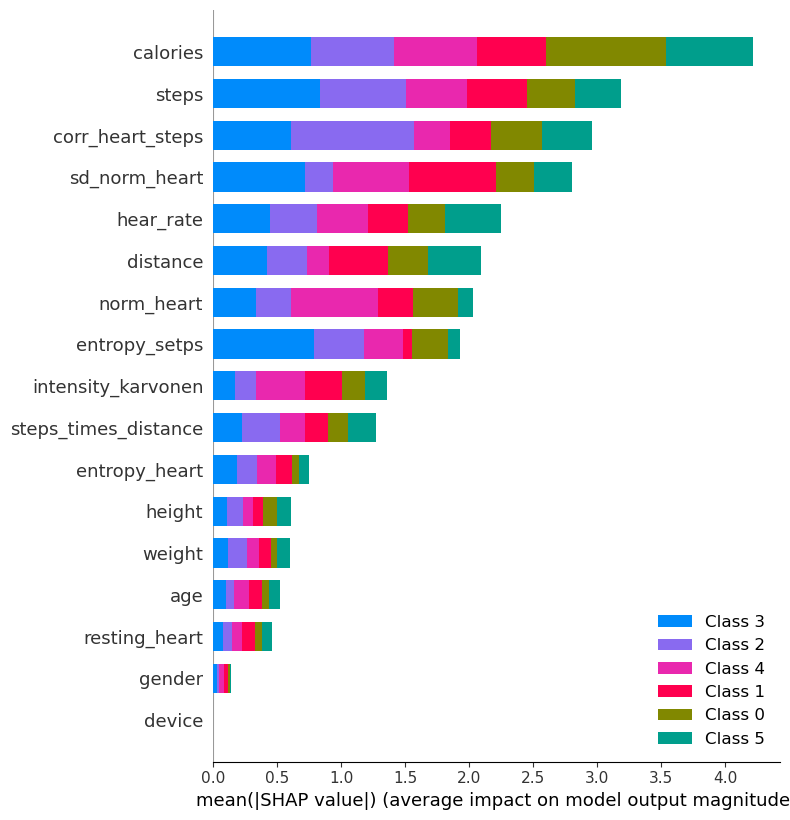

In [18]:
# Step 8: Explainable AI (XAI) - SHAP for Model Interpretation

# Install SHAP if not already installed
# !pip install shap

import shap
import matplotlib.pyplot as plt

# Step 8.1: Create a SHAP explainer
explainer = shap.Explainer(voting_clf.named_estimators_['xgb'], X_train)

# Step 8.2: Compute SHAP values for the test set
shap_values = explainer(X_test)

# shap.summary_plot(shap_values, X_test, plot_type="swarm", show=False)

shap.summary_plot(shap_values, X_test)

# shap.plots.waterfall(shap_values[10])

# shap.summary_plot



100%|===================| 7501/7518 [02:41<00:00]        

🔵 Plotting Bar Plot for Global Feature Importance...


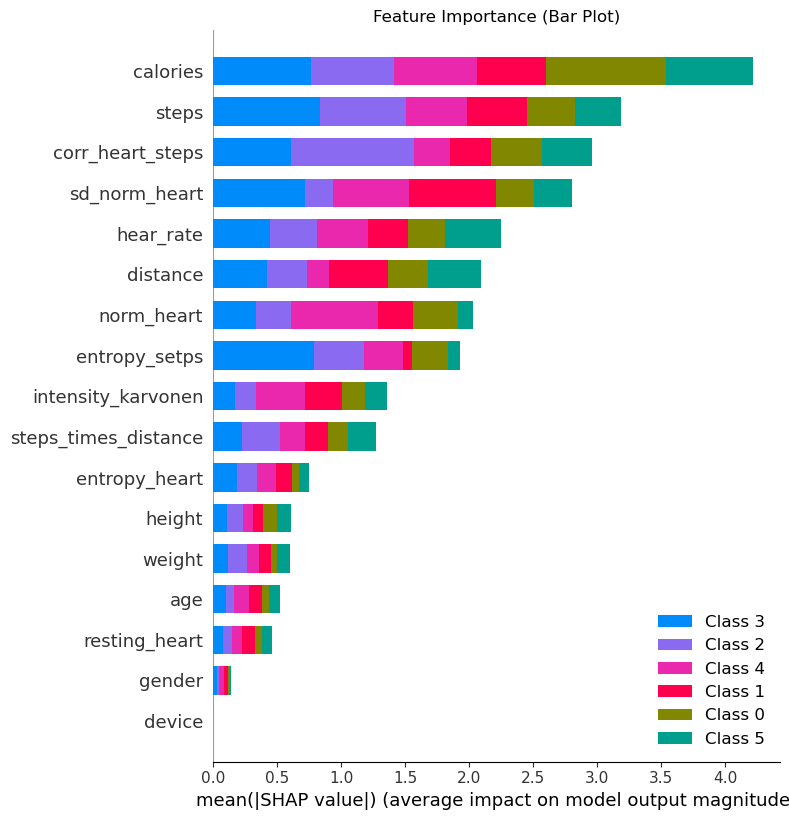

🔵 Plotting Beeswarm Plot for Detailed Feature Effects...


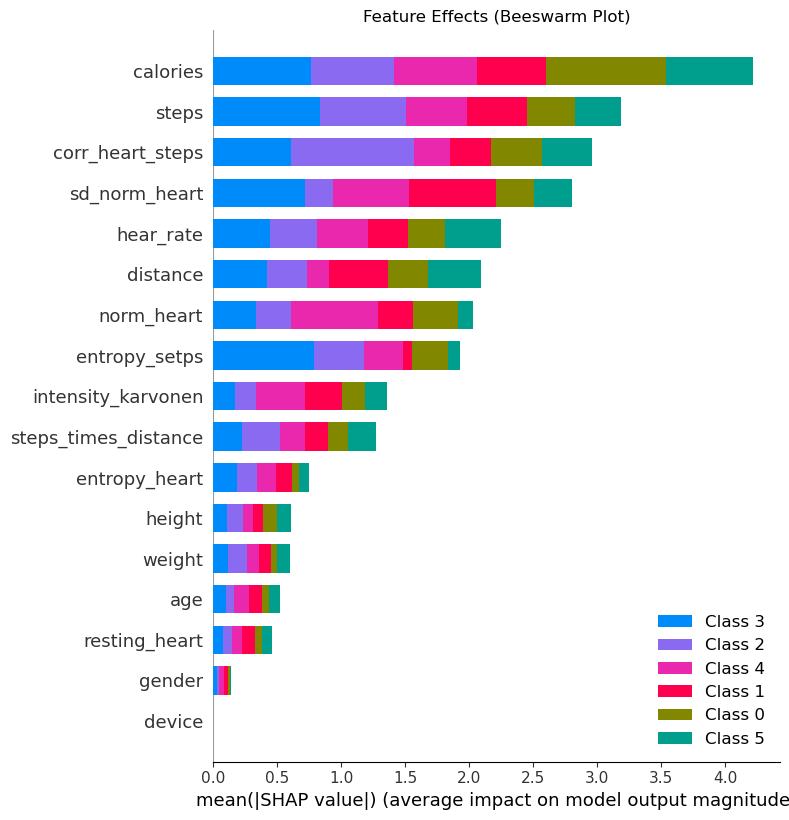

🔵 Plotting Waterfall Plot for a Single Instance...


ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (17, 6)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [ ]:
# Step 8: Explainable AI (XAI) - SHAP for Model Interpretation

# Install SHAP if not already installed
# !pip install shap

import shap
import matplotlib.pyplot as plt

# Step 8.1: Create a SHAP explainer
explainer = shap.Explainer(voting_clf.named_estimators_['xgb'], X_train)

# Step 8.2: Compute SHAP values for the test set
shap_values = explainer(X_test)



# Step 8.3: Bar Plot - Feature Importance
print("🔵 Plotting Bar Plot for Global Feature Importance...")
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Feature Importance (Bar Plot)")
plt.tight_layout()
plt.savefig('shap_bar_plot.png', dpi=300)
plt.show()

# Step 8.4: Beeswarm Plot - SHAP Value Distribution
print("🔵 Plotting Beeswarm Plot for Detailed Feature Effects...")
plt.figure()
shap.summary_plot(shap_values, X_test, show=False)
plt.title("Feature Effects (Beeswarm Plot)")
plt.tight_layout()
plt.savefig('shap_beeswarm_plot.png', dpi=300)
plt.show()

# Step 8.5: Waterfall Plot - Single Prediction
print("🔵 Plotting Waterfall Plot for a Single Instance...")
sample_idx = 0  # Change index if you want another sample
waterfall_exp = shap.Explanation(values=shap_values.values[sample_idx],
                                 base_values=shap_values.base_values[sample_idx],
                                 data=X_test.iloc[sample_idx])

plt.figure()
shap.waterfall_plot(shap_values[0])
plt.title(f"Waterfall Plot (Sample {sample_idx})")
plt.tight_layout()
plt.savefig(f'shap_waterfall_plot_sample{sample_idx}.png', dpi=300)
plt.show()

# Step 8.6: Force Plot - Local Explanation
print("🔵 Plotting Force Plot for a Single Instance...")
force_plot = shap.force_plot(shap_values.base_values[sample_idx],
                             shap_values.values[sample_idx],
                             X_test.iloc[sample_idx],
                             matplotlib=True)
plt.title(f"Force Plot (Sample {sample_idx})")
plt.tight_layout()
plt.savefig(f'shap_force_plot_sample{sample_idx}.png', dpi=300)
plt.show()

# Step 8.7: Dependence Plot - Feature Interaction
print("🔵 Plotting Dependence Plot for 'hear_rate' Feature...")
plt.figure()
shap.dependence_plot("hear_rate", shap_values.values, X_test, show=False)
plt.title("Dependence Plot for 'hear_rate'")
plt.tight_layout()
plt.savefig('shap_dependence_plot_heartrate.png', dpi=300)
plt.show()

In [ ]:
# Step 8.5: Waterfall Plot - Single Prediction
print("🔵 Plotting Waterfall Plot for a Single Instance...")
sample_idx = 0  # Change index if you want another sample
waterfall_exp = shap.Explanation(values=shap_values.values[sample_idx],
                                 base_values=shap_values.base_values[sample_idx],
                                 data=X_test.iloc[sample_idx])

plt.figure()
shap.waterfall_plot(waterfall_exp, show=False)
plt.title(f"Waterfall Plot (Sample {sample_idx})")
plt.tight_layout()
plt.savefig(f'shap_waterfall_plot_sample{sample_idx}.png', dpi=300)
plt.show()

In [19]:
# Step 8: Explainable AI (XAI) - SHAP for Model Interpretation

# Install SHAP if not already installed
# !pip install shap

import shap
import matplotlib.pyplot as plt

# Step 8.1: Create a SHAP explainer
explainer = shap.Explainer(voting_clf.named_estimators_['xgb'], X_train)

# Step 8.2: Compute SHAP values for the test set
shap_values = explainer(X_test)

# shap.summary_plot(shap_values, X_test, plot_type="swarm", show=False)

shap.dependence_plot("steps",shap_values, X_test)

# shap.plots.waterfall(shap_values[10])

# shap.summary_plot



100%|===================| 7509/7518 [02:40<00:00]        

TypeError: loop of ufunc does not support argument 0 of type Explanation which has no callable conjugate method

In [ ]:
import shap
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create SHAP explainer (using the trained XGBoost model)
explainer = shap.Explainer(voting_clf.named_estimators_['xgb'], X_train)

# Step 2: Compute SHAP values for the test set
shap_values = explainer(X_test)

# Step 3: Plot Heatmap for SHAP values
shap_values_array = shap_values.values  # Convert SHAP values to a numpy array
sns.heatmap(shap_values_array, cmap="coolwarm", xticklabels=X_test.columns, yticklabels=None)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('SHAP Value Heatmap')
plt.show()
